<a href="https://colab.research.google.com/github/Bernardis/DataScience_Projects/blob/master/Projeto_Airbnb_Amsterdam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Artigo por **Bernardo Martins**
<center>" Its not about work, its about future "</center>

---

# Análise dos Dados do Airbnb - Amsterdam!

   O [Airbnb](https://www.airbnb.com.br/) é uma **gigante multinacional**, no ramo de hospegaem. Ah, o detalhe é que ele **não possui nenhum hotel**! Com início em 2008, quando dois designers que tinham um espaço sobrando hospedaram três viajantes que procuravam um lugar para ficar; em 2020 já conta com milhões de anfitriões e viajantes que optam por métodos práticos e rápidos de hospedagem.

Conectando mais do que apenas viajentes, o Airbnb conecta pessoas, experiências, vidas... A plataforma inovadora oferece serviços para tornar essa hospedagem alternativa. 

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando e até mesmo superando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="20%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, Analisarei os dados referentes à cidade holandesa de Amsterdam, e ver quais *insights* podem ser extraídos a partir dos dados brutos.**

## Obtenção dos Dados

Todos os dados utilizados foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:

* `listings.csv` - *Summary information and metrics for listings in Amsterdam (good for visualisations).*

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# - importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/the-netherlands/north-holland/amsterdam/2020-05-08/visualisations/listings.csv")

## Análise dos Dados

Esta etapa tem por objetivo situar o leitor e esclarecer sobre como os dados e variáveis estão estruturados ao longo do processo.

**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a estrutura do nosso *dataset*, para este, as 5 primeiras entradas já são suficientes!

In [3]:
# - 5 primeiras entradas
df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,NaN,Oostelijk Havengebied - Indische Buurt,52.36575,4.94142,Private room,59,3,278,2020-02-14,2.05,1,157
1,9693,Top Location on Canal (Center Flat),32366,Sabine And Sander,NaN,Centrum-West,52.37802,4.89270,Entire home/apt,119,3,55,2018-06-29,0.45,1,36
2,20168,Studio with private bathroom in the centre 1,59484,Alexander,NaN,Centrum-Oost,52.36509,4.89354,Private room,100,1,340,2020-04-09,2.74,2,112
3,25428,Lovely apt in City Centre (w.lift) near Jordaan,56142,Joan,NaN,Centrum-West,52.37297,4.88339,Entire home/apt,125,14,5,2020-02-09,0.18,1,132
4,27886,"Romantic, stylish B&B houseboat in canal district",97647,Flip,NaN,Centrum-West,52.38761,4.89188,Private room,155,2,217,2020-03-02,2.14,1,287


### **Quantos atributos e quantas instâncias o nosso conjunto de dados possui? Além disso, quais são os tipos dos atributos?**

Vamos prosseguir e identificar a quantidade de instâncias que nosso conjunto de dados possui e ver os tipos de cada coluna.

Este *dataset* é a versão mais simples do Airbnb. Na página fonte, há outros mais completos e complexos, com até 35847 instâncias e 106 atributos (`listings.csv.gz`)..

In [4]:
# - Volume de dados do DataFrame
print("Instâncias:\t {}".format(df.shape[0]))
print("Atributos:\t {}\n".format(df.shape[1]))

# - Tipos dos atributos
display(df.dtypes)

Instâncias:	 19278
Atributos:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Será que nosso conjuntos de dados é mesmo confiável? Veremos...**

A qualidade do *dataset* é essencial e está inversamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos ou não.

* É possível ver que a coluna `neighbourhood_group` possui 100% dos seus valores faltantes. 
* As variáveis `reviews_per_month` e `last_review` possuem aproximadamente 11% de valores faltantes.
* As variáveis `name` e `host_name` têm aproximadamente 0,1% dos valores nulos.

A variável `neighbourhood_group` não fará parte da nossa análise, portanto, mesmo com 100% dos valores ausentes, nada reflitirá em nossas desições, assim como `reviews_per_month` e `last_review`. Fique tranquilo, caro leitor!

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=True)

id                                0.000000
host_id                           0.000000
neighbourhood                     0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
calculated_host_listings_count    0.000000
availability_365                  0.000000
host_name                         0.000156
name                              0.001712
last_review                       0.119203
reviews_per_month                 0.119203
neighbourhood_group               1.000000
dtype: float64

### **Qual o tipo de distribuição das variáveis?** 

Para vizualizar a distribuição das variáveis, irei plotar o histograma.


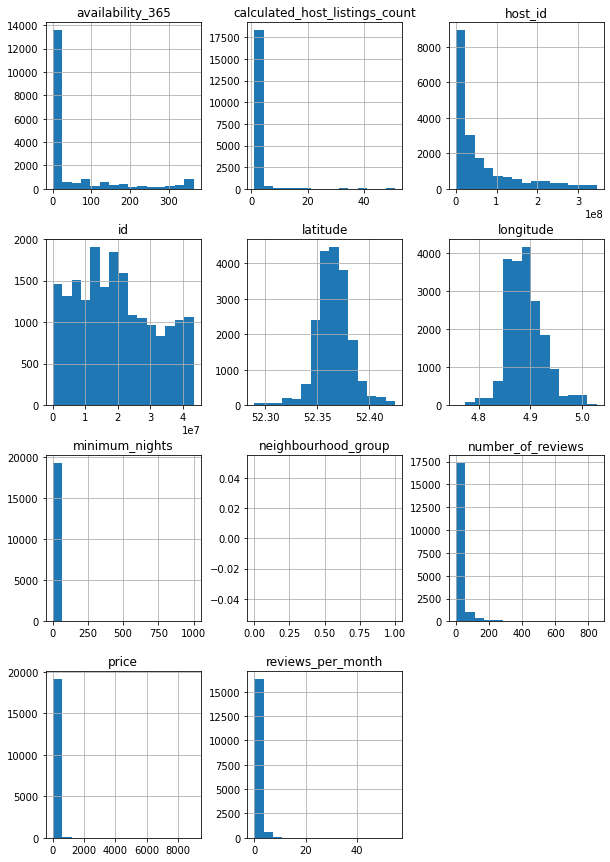

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(bins = 15, figsize=(10, 15));


### **Análise e depuração. Há *outliers* presentes?**

Em estatística, valores atípicos ou *outlier*, é o dado que apresenta um grande afastamento dos demais da série, ou que é inconsistente.

Pela distribuição do histograma, é possível perceber indícios da presença de *outliers*. Principalmenete, pelo comportamento do Histograma nos atributos `price`, `minimum_nights` e `calculated_host_listings_count`.

Os valores não seguem uma distruição padrão, e distorcem as representações gráficas. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para o atributo.

Veremos agora um resumo estatísticos dos atributos (númericos, é claro). Por meio deste, obtemos informações relevantes como Média, Desvio Padrão, Frequência, valores máximos, mínimos e etc..







In [ ]:
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,19278.000000,19278.000000,19278.000000,16980.000000,19278.000000,19278.000000
mean,165.722430,3.517533,25.283017,0.790479,1.975101,54.549798
std,233.884293,13.570089,54.496400,1.284863,4.482957,102.544437
min,5.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,99.000000,2.000000,2.000000,0.180000,1.000000,0.000000
50%,131.000000,2.000000,9.000000,0.410000,1.000000,0.000000
75%,189.000000,3.000000,24.000000,0.810000,1.000000,65.000000
max,9000.000000,1001.000000,850.000000,54.800000,51.000000,365.000000


Examinando os parâmetros estatísticos acima, algumas observações um tanto "estranhas" se sobresaem:

* O atributo `price` possui 75% do valor abaixo de 189. Entretanto, seu valor máximo é 9000.
* A quantidade mínima de noites (`minimum_nights`) está acima de 365 dias no ano.

#### Boxplot para minimum_nights

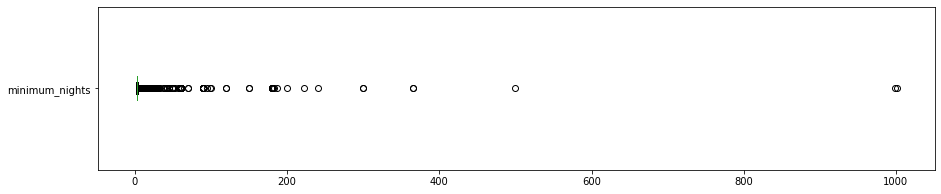

minimum_nights:
valores acima de 30: 85 entradas
O que representa um total de apenas 0.4409%


In [ ]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights:")
print("valores acima de 30:  {} instâncias".format(len(df[df.minimum_nights > 30])))
print("O que representa um total de apenas {:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

#### Boxplot para price

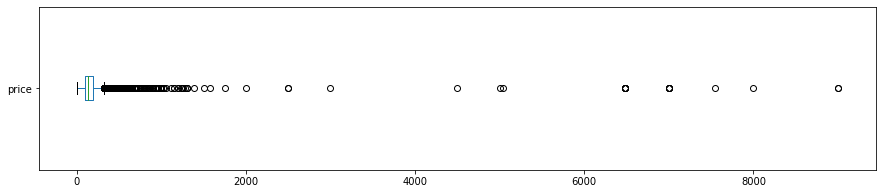


price: 
valores acima de 1500: 24 entradas
O que representa um total de apenas 0.1245%


In [ ]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# Quantidade de valores acima de 1500 para 'price'
print("\nprice: ")
print("valores acima de 1500: {} entradas".format(len(df[df.price > 1500])))
print("O que representa um total de apenas {:.4f}%".format((len(df[df.price > 1500]) / df.shape[0])*100))


#### Histogramas sem *outliers*

A partir dos métodos implementados citados outrora, apurou-se a detecção de valors atípicos, ou seja *outliers*, nos atributos `price` e `minimum_nights`. 

A partir de agora, portanto, vamos limpar nosso *DataFrame* desses valores que prejudicam a autenticidade do nosso trabalho, e plotar os histogramas novamente.





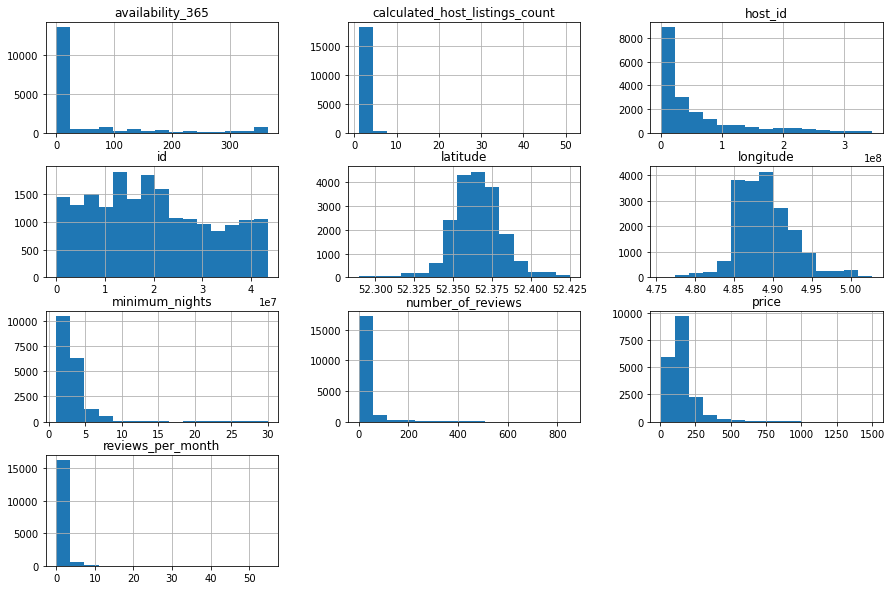

In [ ]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# remover `neighbourhood_group`, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar novamente o  histograma para os atributos numéricos
df_clean.hist(bins=15, figsize=(15,10));

Claramente, Agora pode ser feita uma análise nítida e bem mais exatada sobre os nossos atributos numéricos!


### Existe correlação entre os atributos?

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre dois atributos.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre os atributos de interesse, seguirei os seguintes métodos:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, utilizando biblioteca `seaborn`

In [ ]:
# Matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()


display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.023426,-0.089305,-0.041107,0.083885,0.196285
minimum_nights,0.023426,1.000000,-0.063496,-0.105916,-0.000573,0.031063
number_of_reviews,-0.089305,-0.063496,1.000000,0.759450,-0.019915,0.284987
reviews_per_month,-0.041107,-0.105916,0.759450,1.000000,0.037564,0.321118
calculated_host_listings_count,0.083885,-0.000573,-0.019915,0.037564,1.000000,0.158670
availability_365,0.196285,0.031063,0.284987,0.321118,0.158670,1.000000


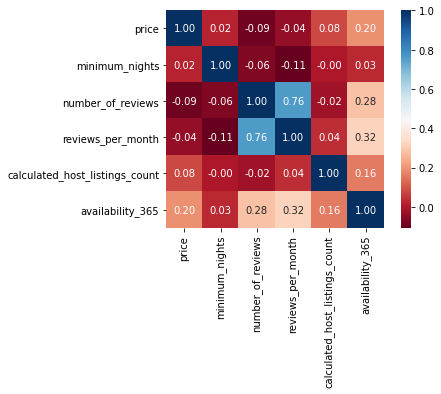

In [ ]:
#Gerando mapa de calor, ou heatmap, a partir da matriz de correlação
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Qual o tipo de imóvel mais alugado no Airbnb?**

O atributo `room_type` como o nome sugere, indica o tipo de locação anunciada pelo anfitrião. Se você tem familiaridade com a plataforma, sabe que existem opções de locações inteiras, apenas o aluguel de um quarto ou até mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    14958
Private room        3894
Hotel room           275
Shared room           43
Name: room_type, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.780282
Private room       0.203130
Hotel room         0.014345
Shared room        0.002243
Name: room_type, dtype: float64

Fica claro, como esperado, que os imóveis mais alugados são do tipo Entire home/apt. Ou seja, a locação do imóvel sem compartilhamento.

### **Qual a localidade mais cara de Amsterdam?**

Uma maneira de se verificar um atributo em função do outro é usando `groupby()`. No caso, queremos comparar os bairros (*neighbourhoods*) a partir do preço de locação.

In [ ]:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Centrum-West                197.212494
Centrum-Oost                195.057831
Zuid                        182.530015
De Pijp - Rivierenbuurt     165.355258
Oud-Noord                   161.444640
IJburg - Zeeburgereiland    159.229759
Westerpark                  152.919107
De Baarsjes - Oud-West      150.599317
Oud-Oost                    147.382588
Watergraafsmeer             146.444649
Name: price, dtype: float64

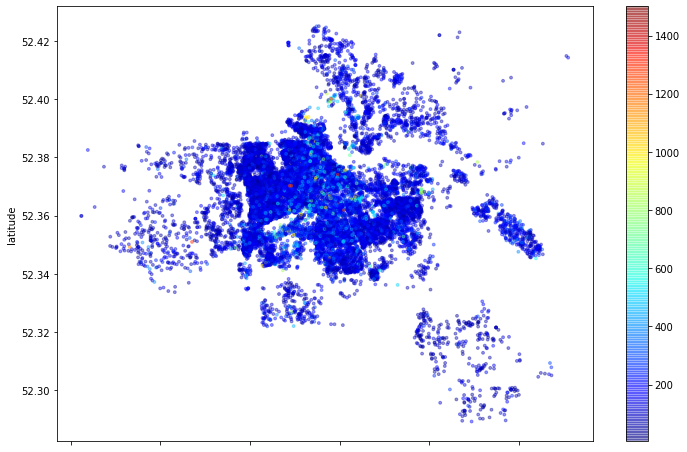

In [ ]:
#Plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

## Conclusões

Mesmo com a análise sem aprofundamento teórico-matemático, percebeu-se fatores **importantíssimos** que devem ser levados em conta em análises estatísticas, como os outliers e seus tratamentos, afim de não comprometer a autenticidade da análise.

Além disso, ressalto a importância de métodos visuais e bem descritivos que auxiliam em todo o processo. Aqui foi usado várias dessas ferramentas, use também, não precisa ter medo! :)

Por fim, lembre-se que este *dataset* é uma versão mais simples, ideal apenas para uma abordagem inicial. Recomendo que em caso de análises mais complexas o conjunto de dados mais completo seja utilizado, com mais atributos e instâncias disponíveis!



<center>" The show must go on. " - Queen.</center>